In [294]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [295]:
def function(x1,x2):
    return (x1+1 + np.random.normal(0,1,1))[0]

def gen_data(n):
    x1 = []
    x2 = []
    y = []
    for i in range(n):
        x1.append(np.random.random()*10) 
        x2.append(np.random.random()*10) 
        y.append(function(x1[i],x2[i]))
    
    df = pd.DataFrame({'x1':x1,'x2':x2,'y':y})

    return df

In [296]:
df = gen_data(1000)
print(df.head())

         x1        x2         y
0  4.928360  6.120376  6.154637
1  2.924993  6.131291  3.136748
2  1.837597  5.055784  3.209066
3  4.903446  7.902733  5.060418
4  7.776943  1.113389  9.290078


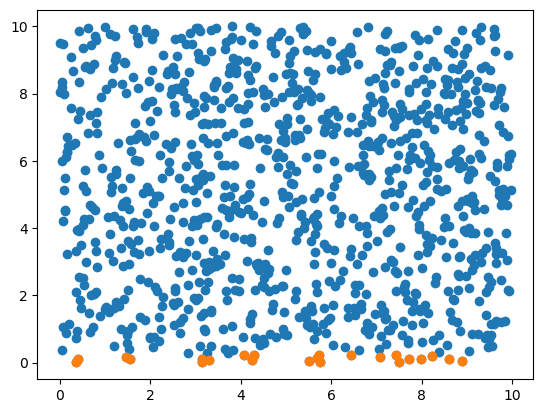

In [297]:
df2 = df[df['x2'] < 0.25]

plt.scatter(df['x1'],df['x2'])
plt.scatter(df2['x1'],df2['x2'])
plt.show()

In [298]:
lr = LinearRegression()
X = df[['x1','x2']]
y = df[['y']]

lr.fit(X,y)
print(lr.coef_)


[[1.00337609 0.0050444 ]]


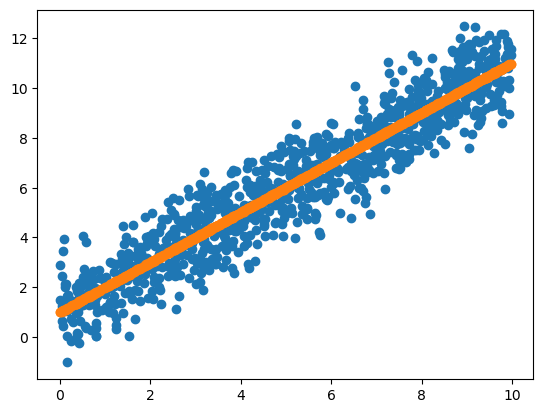

In [299]:
y_hat = lr.predict(X)

plt.scatter(df['x1'],y)
plt.scatter(df['x1'],y_hat)
plt.show()

In [300]:
error = metrics.mean_squared_error(y,y_hat)
print(error)

0.986757609012373


In [301]:
df = gen_data(10)

X = df[['x1','x2']]
y = df[['y']]
lr = LinearRegression()
lr.fit(X,y)

y_hat = lr.predict(X)

print(metrics.mean_squared_error(y,y_hat))

0.403068140824882


In [302]:
def mean_error(n,k):
    errors = []
    for _ in range(k):
        df = gen_data(n)
        X = df[['x1','x2']]
        y = df[['y']]
        lr = LinearRegression()
        lr.fit(X,y)
        df_test = gen_data(100)
        X_test = df_test[['x1','x2']]
        y_test = df_test[['y']]
        y_hat = lr.predict(X_test) 
        errors.append(metrics.mean_squared_error(y_test,y_hat))   

    return np.average(errors)
    

In [303]:
#print(mean_error(1000,1000))
#print(mean_error(10,1000))

In [304]:
def get_opt(n,k):
    opt = []
    for i in range(k):
        df = gen_data(n)
        X = df[['x1','x2']]
        y = df[['y']]
        lr = LinearRegression()
        lr.fit(X,y)
        y_hat = lr.predict(X) 
        error_train = metrics.mean_squared_error(y,y_hat)
        df_test = gen_data(100)
        X_test = df_test[['x1','x2']]
        y_test = df_test[['y']]
        y_hat = lr.predict(X_test) 
        error_test = metrics.mean_squared_error(y_test,y_hat)
        opt.append(error_test-error_train)

    return np.average(opt)


In [305]:
print(get_opt(1000,1000))

0.0030509725844922865


In [306]:
print(get_opt(20,1000))
print(get_opt(50,1000))
print(get_opt(100,1000))

0.31424872659365666
0.12113052150965765
0.061990734009738965
